# 5. Issue Selection

* 싸이지먼트 / FinAlgML : 파트 1 - Quantitative Technical Analysis [1]
* 김무성

# Contents

* Market Research
* Risk and Profit Potential
    - Simulation Outline
    - Sidebar - Calculating CAR
    - Drawdown as a Function of Holding Period
    - Profit Potential
    - Risk in Being Short
    - What the Prospector Found
    - Which Issues are "Best"
    - Universal Objective Function
    - Holding Longer
    - Portfolios
* Summary
* Estmating Profit Potential
    - A Monte Carlo Simulation Program
* Program Listing

<img src="figures/cap5.1.png" width=600 />

# Market Research

#### The best issues to trade combine three characteristics:

* Adequate profit potential - some price variation.
* Absence of extreme adverse price changes - not too much price variation.
* Existence of detectable signal patterns - not too efficient

# Risk and Profit Potential

* Simulation Outline
* Sidebar - Calculating CAR
* Drawdown as a Function of Holding Period
* Profit Potential
* Risk in Being Short
* What the Prospector Found
* Which Issues are "Best"
* Universal Objective Function
* Holding Longer
* Portfolios

#### Risk, safe-f, profit potential

* Given a data series and two variables - holding period and system accuracy - we can estimate the risk inherent in the serise. 
* Given the risk inherent in the series and your personal statement of risk tolerance, we can determine safe-f.
* Given safe-f, we can estimate profit potential.

#### The analysis described here assumes :
* You have a trading system that trades a single issue and is either long or flat.
* All the rules have been included in the model.
* There will be no subjective position changes or early exits.
* Equity is marked-to-market at the close of every trading day.

## Simulation Outline

The analysis is done using a Monte Carlo simulator implemented in a Python program.

#### control varialbes

* Your Risk tolerance
* The issue being tested.
* Any time period longer than the forecast period can be used.
* The holding period of each trade in days.
* Accuracy of the trading systems.
* The number of simulation runs.

#### Preliminaries

#### measurement

* Intra-day drawdown
    - measured using daily high and low.
* Intra-trade drawdown
    - measured using mark-to-market daily closing price.
* Trade drawdown 
    - measured from the trade open to trade close
* Account equity 
    - value of shares held plus cash

#### Figure 5.2 shows ten equally likely equity curves resulting from trading SPY with a holding period of 5 days, an accuracy of 65%, and a fraction of 1.00.

<img src="figures/cap5.2.png" width=600 />

#### Figure 5.3 shows a table with the metrics for those ten runs.

* Max IDDD
* Max ITDD
* Max TRDD
* EqAtClose
* CAR - compound anual rate of return

<img src="figures/cap5.3.png" width=600 />

## Sidebar - Calculating CAR

* The simulation continues

#### Calcuating CAR

* TWR
    - Terminal wealth relative
    - ratio of final equity to initial equity
    - TWR is EqAtClose / inital equity
* CAR
    - Compound annual rate of return
* Final equity(TWR), CAR, and number of years(N)
    - TWR = (1+CAR)^N
    - CAR = exp(ln(TWR)/N)-1
* For a two year forecast period, a close approximation of CAR, expressed as percent, is given by :
    - CAR = 100.0 * (sqrt(TWR) - 1)

### The simulation continues

* The risk tolerance requires intra-trade marked-to-market daily drawdown at the 95th percentile to be no greater than 20 percent.
* Intra-trade marked-to-market-daily drawdown is the second column - Max ITDD
* If results for all 1000 runs were listed and sorted by that column, we want the first 950 to have values less than 0.2000, the final 50 to be greater.
* There is no advantage in having the final 50 be less than 0.2000, a situationthat would occur only if the fraction of available equity used for each trade was lower than the maximum safe-f.
* Intentionally using a lower fraction dose lower risk, but it lowers profit even more. You do want to coordinate your risk tolerance with the fraction used and take the largest positions that are safe.

#### Safe-f is found to be 0.646

#### Figure 5.4 shows ten equally likely equity curves for the same holding period and accuracy as those show in Figure 5.2, but with a fraction of 0.646 rather than 1.00.

<img src="figures/cap5.4.png" width=600 />

<img src="figures/cap5.5.png" width=600 />

## Drawdown as a Function of Holding Period

<img src="figures/cap5.6.png" width=600 />

## Profit Potential

<img src="figures/cap5.7.png" width=600 />

<img src="figures/cap5.8.png" width=600 />

## Risk in Being Short

<img src="figures/cap5.9.png" width=600 />

## What the Prospector Found

<img src="figures/cap5.10.png" width=600 />

<img src="figures/cap5.10b.png" width=600 />

<img src="figures/cap5.10c.png" width=600 />

<img src="figures/cap5.10d.png" width=600 />

<img src="figures/cap5.10e.png" width=600 />

## Which Issues are "Best"

## Universal Objective Function

## Holding Longer

<img src="figures/cap5.11.png" width=600 />

<img src="figures/cap5.12.png" width=600 />

<img src="figures/cap5.13.png" width=600 />

<img src="figures/cap5.14.png" width=600 />

## Portfolios

# Summary

# Estmating Profit Potential

* A Monte Carlo Simulation Program

## A Monte Carlo Simulation Program

# Program Listing

### Listing 5.1. 

Python code for the simulator that computes rist, determines maximum safe position size, and estimates profit potential.

In [ ]:
"""
ComuteRiskLong.py

A Python program that implements the 
Monte Carlo simulation analysis described
in Chapter 5 of the book
"Quantitative Technical Analysis"
written by Dr. Howard Bandy
and published by Blue Owl Press, Inc.

Copyright @2014 Howard Bandy

Autho: Howard Bandy
Blue Owl Press, Inc.
www.BlueOwlPress.com
"""

In [3]:
%matplotlib inline
from datetime import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.io.data import DataReader
import random
from scipy import stats
import time

In [4]:
accurarcy_tolerance = 0.005

In [5]:
# ------------
# User sets parameter values here
# Scalars, unless otherwise noted

issue = 'spy'
data_source = 'yahoo'
start_date = datetime(1999, 1, 1)
end_date = datetime(2012, 1, 1)

In [6]:
hold_days = 5
system_accuracy = .75
DD95_limit = 0.20
initial_equity = 100000.0
fraction = 1.00
forecast_horizon = 504 # trading days
number_forecasts = 10 # Number of simulated forecasts

In [7]:
print '\n\nNew simulation run '
print '  Testing profit potential for Long positions\n'
print 'Issue:            ' + issue
print 'Dates:            ' + start_date.strftime('%d %b %Y')
print '   to:            ' + end_date.strftime('%d %b %Y')
print 'Hold Days:        %i '  %hold_days 
print 'System Accuracy:  %.2f '  %system_accuracy
print 'DD 95 limit:      %.2f '  %DD95_limit
print 'Forecast Horizon: %i '  %forecast_horizon
print 'Number Forecasts: %i '  %number_forecasts
print 'Initial Equity: %i '  %initial_equity



New simulation run 
  Testing profit potential for Long positions

Issue:            spy
Dates:            01 Jan 1999
   to:            01 Jan 2012
Hold Days:        5 
System Accuracy:  0.75 
DD 95 limit:      0.20 
Forecast Horizon: 504 
Number Forecasts: 10 
Initial Equity: 100000 


In [8]:
# --------------------
# Variables used for simulation

In [9]:
qt = DataReader(issue, data_source, start_date, end_date)
print qt.shape
print qt.head()

(3271, 6)
                Open        High         Low       Close   Volume  Adj Close
Date                                                                        
1999-01-04  123.3750  125.218697  121.718697  123.031197  9450400  91.009244
1999-01-05  122.9375  124.875000  122.937500  124.437500  8031000  92.049521
1999-01-06  125.8125  127.750000  125.750000  127.437500  7737700  94.268696
1999-01-07  126.3750  127.218697  125.781197  126.812500  5504900  93.806368
1999-01-08  128.1875  128.500000  125.968697  127.750000  6224400  94.499860


In [10]:
print qt.tail()

                  Open        High         Low       Close     Volume  \
Date                                                                    
2011-12-23  125.669998  126.430000  125.410004  126.389999   92187200   
2011-12-27  126.169998  126.820000  126.059998  126.489998   86075700   
2011-12-28  126.510002  126.529999  124.730003  124.830002  119107100   
2011-12-29  125.239998  126.250000  124.860001  126.120003  123507200   
2011-12-30  126.019997  126.330002  125.500000  125.500000   95599000   

             Adj Close  
Date                    
2011-12-23  117.167528  
2011-12-27  117.260230  
2011-12-28  115.721361  
2011-12-29  116.917233  
2011-12-30  116.342470  


In [11]:
nrows = qt.shape[0]
print 'Number Rows:    %d '  %nrows

Number Rows:    3271 


In [12]:
qtC = qt.Close

In [13]:
qtC.head()

Date
1999-01-04    123.031197
1999-01-05    124.437500
1999-01-06    127.437500
1999-01-07    126.812500
1999-01-08    127.750000
Name: Close, dtype: float64

In [14]:
qtC.tail()

Date
2011-12-23    126.389999
2011-12-27    126.489998
2011-12-28    124.830002
2011-12-29    126.120003
2011-12-30    125.500000
Name: Close, dtype: float64

In [15]:
number_trades = forecast_horizon / hold_days
number_days = number_trades * hold_days
print 'Number Days:    %i '  %number_days
print 'Number Trades:  %d '  %number_trades

Number Days:    500 
Number Trades:  100 


In [16]:
al = number_days + 1
# These arrays are the number of days in the forecast
account_balance = np.zeros(al)  # account balance

In [17]:
pltx = np.zeros(al)
plty = np.zeros(al)

In [18]:
max_IT_DD = np.zeros(al)     # Maximum Intra-Tarde drawdown
max_IT_Eq = np.zeros(al)     # Maximum Intra-Tarde equity

In [19]:
#  Theas arrays are the number of sumuations runs
# Max intra-trade drawdown
FC_max_IT_DD = np.zeros(number_forecasts)
# Trade equity (TWR)
FC_tr_eq = np.zeros(number_forecasts)

In [20]:
# ----------------------
#  Set up gainer and loser lists
gainer = np.zeros(nrows)
loser = np.zeros(nrows)
i_gainer = 0
i_loser = 0

In [21]:
for i in range(0, nrows - hold_days) :
    if (qtC[i + hold_days] > qtC[i]) :
        gainer[i_gainer] = i
        i_gainer = i_gainer + 1
    else :
        loser[i_loser] = i
        i_loser = i_loser + 1

In [22]:
number_gainers = i_gainer
number_losers = i_loser

In [23]:
print 'Number Gainers: %d '  %number_gainers
print 'Number Losers:  %d '  %number_losers

Number Gainers: 1735 
Number Losers:  1531 


In [26]:
###################################
#   Solve for fraction
fraction = 1.0
done = False

In [27]:
while not done :
    done = True
    print 'Using fraction: %.3f '  %fraction
    # -------------------------------
    #   Beginning a new forecast run
    for i_forecast in range(number_forecasts) :
    #  Initialize for trade sequence
        i_day = 0    # i_day counts to end of forecasts
        #  Daily arrays, so running history can be plotted
        # Starting account balance
        account_balance[0] = initial_equity
        # Maximum intra-trade equity
        max_IT_Eq[0] = account_balance[0]
        max_IT_DD[0] = 0
        
        # for each trade
        for i_trade in range(0, number_trades) :
            #  Select the trade and retrieve its index
            #  Into the price array
            #  gainer or loser?
            #  Uniform for win/loss
            gainer_loser_random = np.random.random()
            #  pick a trade accordingly
            #  for long positions, test is "<"
            #  for short positions, test is ">"
            if gainer_loser_random < system_accuracy :
                #  choose a gaining trade
                gainer_index = np.random.random_integers(0, number_gainers)
                entry_index = gainer[gainer_index]
            else :
                #  choose a losing trade
                loser_index = np.random.random_integers(0, number_losers)
                entry_index = loser[loser_index]
                
            # Process the trade, day by day
            for i_day_in_trade in range(0, hold_days+1) :
                if i_day_in_trade==0 :
                    #  Things that happen immediately
                    #  after the close of the signal day
                    #  Initialize for the trade
                    buy_price = qtC[entry_index]
                    number_shares = account_balance[i_day] * fraction / buy_price
                    share_dollars = number_shares * buy_price
                    cash = account_balance[i_day] - share_dollars
                else :
                    #  Things that change during a
                    #  day the trade is held
                    i_day = i_day + 1
                    j = entry_index + i_day_in_trade
                    #  Drawdown for the trade
                    profit = number_shares * (qtC[j] - buy_price)
                    MTM_equity = cash + share_dollars + profit
                    IT_DD = (max_IT_Eq[i_day-1] - MTM_equity) / max_IT_Eq[i_day-1]
                    max_IT_DD[i_day] = max(max_IT_DD[i_day-1], IT_DD)
                    max_IT_Eq[i_day] = max(max_IT_Eq[i_day-1], MTM_equity)
                    account_balance[i_day] = MTM_equity
                if i_day_in_trade == hold_days :
                    #  Exit at the close
                    sell_price = qtC[j]
                    #  Check for end of forecast
                    if i_day >= number_days :
                        FC_max_IT_DD[i_forecast] = max_IT_DD[i_day]
                        FC_tr_eq[i_forecast] = MTM_equity
 
    #  All the forecasts have been run
    #  Find the drawdown at the 95th percentile
    DD_95 = stats.scoreatpercentile(FC_max_IT_DD,95)
    print '   DD: %.3f  ' % DD_95
    if (abs(DD95_limit - DD_95) < accurarcy_tolerance) :
        #  Close enough
        done = True
    else :
        #  Adjust fraction and make a new set of forecasts
        fraction = fraction * DD95_limit / DD_95
        done = False

Using fraction: 1.000 
   DD: 0.162  
Using fraction: 1.234 
   DD: 0.244  
Using fraction: 1.011 
   DD: 0.222  
Using fraction: 0.911 
   DD: 0.226  
Using fraction: 0.807 
   DD: 0.226  
Using fraction: 0.716 
   DD: 0.118  
Using fraction: 1.216 
   DD: 0.197  


In [28]:
#  Report
#IT_DD_25 = stats.scoreatpercentile(FC_max_IT_DD, 25)
#IT_DD_50 = stats.scoreatpercentile(FC_max_IT_DD, 50)
IT_DD_95 = stats.scoreatpercentile(FC_max_IT_DD, 95)
print 'DD95: %.3f ' %IT_DD_95,

DD95: 0.197 


In [30]:
years_in_forecast = forecast_horizon / 252.0

TWR_25 = stats.scoreatpercentile(FC_tr_eq,25)
CAR_25 = 100*(((TWR_25/initial_equity) ** (1.0/years_in_forecast))-1.0)

CAR_25

49.167765169900868

In [31]:
TWR_50 = stats.scoreatpercentile(FC_tr_eq,50)
CAR_50 = 100*(((TWR_50/initial_equity) ** (1.0/years_in_forecast))-1.0)

CAR_50

66.749807427958217

In [32]:
TWR_75 = stats.scoreatpercentile(FC_tr_eq,75)
CAR_75 = 100*(((TWR_75/initial_equity) ** (1.0/years_in_forecast))-1.0)

CAR_75

97.219552063400556

In [33]:
#  Plot maximum drawdown
for i in range(al) :
    pltx[i] = i
    plty[i] = max_IT_DD[i]

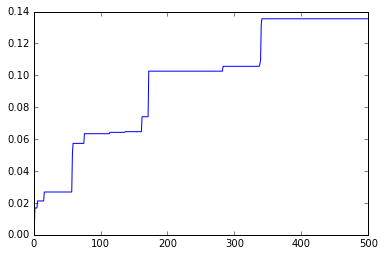

In [34]:
plt.plot(pltx, plty)

# 참고자료 